# Salary Analysis

In [17]:
# Importing Libraries
import pandas as pd
import ast 
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data 
dataset = load_dataset('lukebarousse/data_jobs')
df =  dataset['train'].to_pandas() # Converting to Pandas DataFrame 

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x:ast.literal_eval(x) if pd.notna(x) else x)

In [18]:
df_India = df[df['job_country'] == 'India'].dropna(subset=['salary_year_avg']).copy()

In [19]:
job_titles = df_India['job_title_short'].value_counts().index[:6].tolist().copy()
job_titles

['Data Engineer',
 'Data Analyst',
 'Data Scientist',
 'Machine Learning Engineer',
 'Senior Data Engineer',
 'Software Engineer']

In [20]:
df_India_top6 = df_India[df_India['job_title_short'].isin(job_titles)].copy()

In [21]:
job_order = df_India_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index.copy()

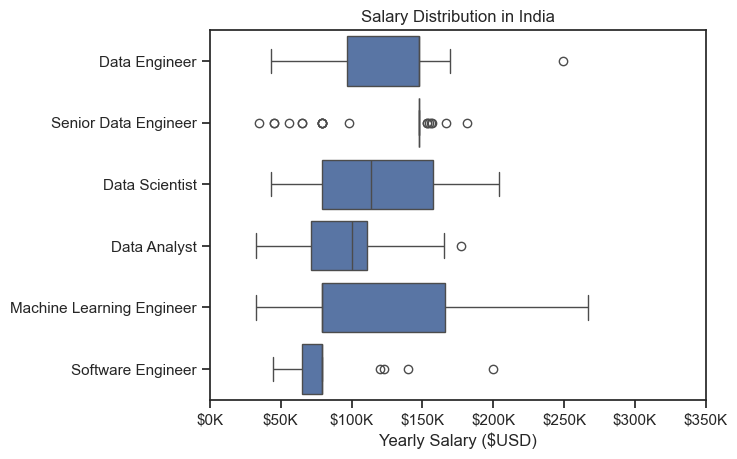

In [22]:
sns.boxplot(data=df_India_top6, x='salary_year_avg', y='job_title_short', order=job_order)
sns.set_theme(style='ticks')
plt.title('Salary Distribution in India')
plt.xlabel('Yearly Salary ($USD)')
plt.ylabel('')
plt.xlim(0,350000)
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

In [46]:
df_DA_India = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'India')].dropna(subset=['salary_year_avg']).copy()
df_DA_India = df_DA_India.explode('job_skills')
df_DA_India[['salary_year_avg','job_skills']].head(5)

,salary_year_avg,job_skills
11412,50400.0,python
11412,50400.0,sql
11412,50400.0,aws
11412,50400.0,azure
11412,50400.0,excel


In [35]:
df_DA_top_pay = df_DA_India.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='median',ascending=False).head(10)
df_DA_top_pay

,count,median
job_skills,,
postgresql,1,165000.0
pyspark,1,165000.0
gitlab,1,165000.0
linux,1,165000.0
mysql,1,165000.0
gdpr,2,163782.0
mongodb,6,163782.0
scala,3,163782.0
neo4j,1,163782.0


In [40]:
df_DA_skills = df_DA_India.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count',ascending=False).head(10).sort_values(by='median',ascending=False)
df_DA_skills

,count,median
job_skills,,
power bi,17,111175.0
spark,11,111175.0
tableau,20,108087.5
excel,39,98500.0
sql,46,96050.0
python,36,96050.0
azure,15,93600.0
r,18,79200.0
aws,12,79200.0


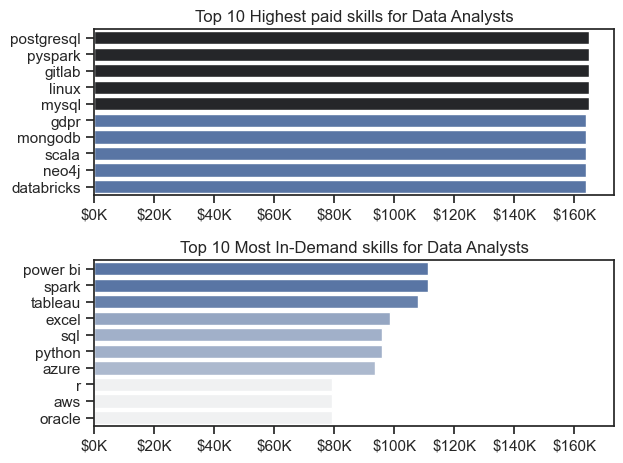

In [47]:
fig,ax = plt.subplots(2,1)
sns.set_theme(style='ticks')

sns.barplot(data=df_DA_top_pay,x='median',y= df_DA_top_pay.index, hue='median',ax=ax[0], palette='dark:b_r')
ax[0].legend().remove()
ax[0].set_title('Top 10 Highest paid skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'${int(x/1000)}K'))
sns.barplot(data=df_DA_skills,x='median', y=df_DA_skills.index, hue='median',ax=ax[1],palette='light:b')
ax[1].legend().remove()
ax[1].set_title('Top 10 Most In-Demand skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'${int(x/1000)}K'))
plt.tight_layout()
plt.show()